# Homework 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Question 1

1. Reading the data into a dtataframe

In [2]:
df = pd.read_csv('../../Data/main/possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


2. Finding if there are any cells containing null values, and remove those rows.

In [3]:
# Before dropping NaN values
print(df.isnull().sum())

# Dropping NaN values
df = df.dropna()

# After dropping NaN values
print(df.isnull().sum())

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64
case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


3. Dropping the `case`, `site`, and `pop` columns.

In [4]:
# Dropping columns
df = df.drop(['case', 'site', 'Pop'], axis=1)

4. Constructing `labels` and `features` from the dataframe.

In [5]:
# setting labels
labels = df['sex']

# setting features
features = df.drop('sex', axis=1)

labels.shape, features.shape    

((101,), (101, 10))

In [6]:
df.head()

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## Question 2

1. Splitting the features and labels into 75% training and 25% testing using `train_test_split()`

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=250)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 10), (26, 10), (75,), (26,))

2. Predict the label (m or f) of each test data based on the K-nearest-neighbor technique. Use a value of K>1 and either Euclidean or Manhattan distance.

In [8]:
# normalizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# prediction
y_pred = knn.predict(X_test_scaled)

# accuracy
print(f'Accuracy: {knn.score(X_test_scaled, y_test)}')

Accuracy: 0.6923076923076923


## Question 3

Evaluating the performance on the test data using normalized confusion matrix.

(I'm using the confusion matrix function, not the one written in class)

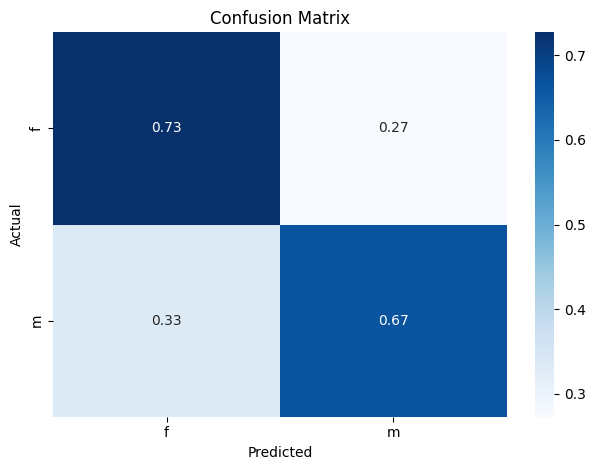

In [10]:
# confusion matrix (normalizing it as well)
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test), normalize='true')
# making the confusion matrix a dataframe for plotting
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# plotting
sn.heatmap(cm_df, cmap="Blues", annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

So the accuracy is about 70%. We can play around with the number of neighbors to make it a little better perhaps, but this pretty good for KNN.